# Raumluftqualität 2.0

## Zeitliche Entwicklung der CO_2-Konzentration in Räumen

In einem gut gelüfteten, leeren Raum wird sich zunächst genau so viel CO_2 befinden, wie in der Außenluft. 

Wenn sich dann Personen in den Raum begeben und CO_2 freisetzen, wird die CO_2-Konzentration langsam zunehmen. Auf welchen Wert sie sich schließlich einstellt, hängt vom Außenluftvolumenstrom ab, mit dem der Raum belüftet wird.

Bei einem völlig unbelüfteten Raum wird das von den Personen produzierte CO_2 sich in der Raumluft immer stärker anreichern, wobei je Zeiteinheit die gleiche Menge an CO_2 freigesetzt wird.

### Beispiel:

In einem Raum von $15 \rm m^2$ Grundfläche bei $2.5 \rm m$ Geschosshöhe befinden sich 2 Personen, die je Person $30\,{\frac{\ell}{h}}$ CO_2 ausatmen. Die CO_2-Konzentration der Außenluft ist 400 ppM. Im Raum sollen 1200 ppM CO_2 zulässig sein.

Stellen Sie die zeitliche Entwicklung der CO_2-Konzentration in einem Diagramm dar.

Gegeben: 

Raumvolumen: $V_{\rm ra} = 15 {\rm m^2}\cdot 2.5 {\rm m} = 37.5 {\rm m^3}$ 

CO_2-Produktion: $\dot V_{\rm sch} = 2\cdot 30 {\rm \dfrac{\ell}{h}} = 60\,000\, {\rm\dfrac{cm^3}{h}}$

Damit ergibt sich die Änderungsrate 
$
  \dot k = \cfrac{\dot V_{\rm sch}}{V_{\rm ra}} 
         = {\rm\dfrac{60\,000\,cm^3}{37.5\, m^3\cdot h}}
         = {\rm 1600 \dfrac{ppM}{h}}
$

Für das Schadstoffvolumen im Raum ergibt sich:

\begin{align}
  k(t)&= 400 {\rm ppM} + 1600\,{\rm\dfrac{ppM}{h}}\, t
\end{align}

Dies Ergebnis wird in den folgenden Zeilen in einem Diagramm dargestellt:

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

,0,1,2,3,4,5,6,7,8,9,10,11,12
t,0.0,10.000000,20.000000,30.0,40.000000,50.000000,60.0,70.000000,80.000000,90.0,100.000000,110.000000,120.0
k,400.0,666.666667,933.333333,1200.0,1466.666667,1733.333333,2000.0,2266.666667,2533.333333,2800.0,3066.666667,3333.333333,3600.0


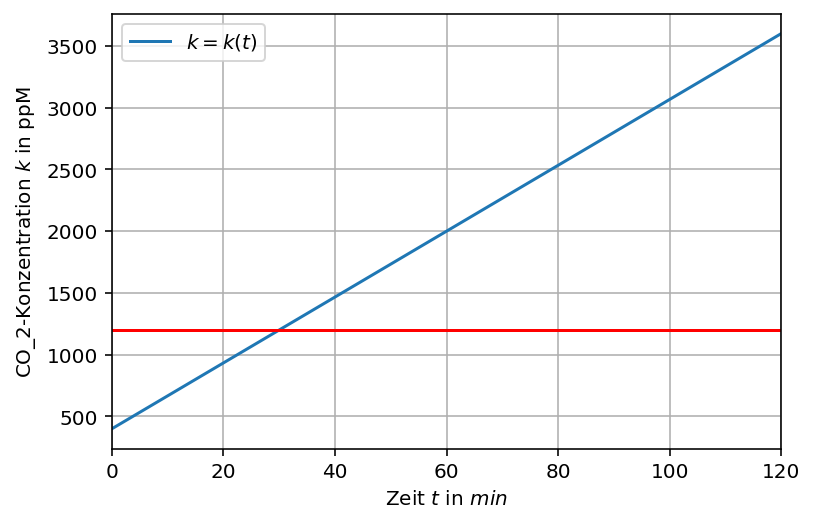

In [2]:
lt = np.linspace(0,120,13) # 10-min Schritte
df = pd.DataFrame(
    {
        't': lt,
        'k': 400 + 1600*lt/60 # 60min = 1h
    }
)

display(df.T)
ax=df.plot(x='t',y='k', label='$k = k(t)$')
ax.axhline(1200,c='r')
ax.grid()
ax.set(
    xlim=(0,120),xlabel='Zeit $t$ in $min$',
    ylabel='CO_2-Konzentration $k$ in $\mathrm{ppM}$'
);

Die zulässige CO_2-Konzentration wird bereits nach kurzer Zeit (etwa 30 min) erreicht. Nach etwa einer Stunde ist die Raumluftqualität inakzeptabel.

### Aufgabe

In einem Gebäude ($400 \rm m^2$ Grundfläche, $3.50 \rm m$ Raumhöhe) arbeiten 120 Personen körperlich mittelschwer belastet. Berechnen Sie unter der Voraussetzung, dass das Gebäude nicht belüftet wird, wie sich die CO_2-Konzentration im Raum entwickelt. Die CO_2-Konzentration der Außenluft beträgt 400 ppM.

Nach welcher Zeit wird die zulässige CO_2-Konzentration von 1200 ppM überschritten?

Stellen Sie den Vorgang in einem Diagramm dar.

In [3]:
A_ra = 400 # m**2
h_ra = 3.5 # m
V_ra = A_ra*h_ra
V_ra

1400.0

In [4]:
n = 120 # Personen
dV_co2_person = 30e-3 # 30 l/h

dV_co2 = n*dV_co2_person
dV_co2

3.5999999999999996

In [20]:
k_0 = k_au = 400e-6 # 400 ppM
k_zul = 1200e-6 # 1200 ppM

lt = np.linspace(0,2) # Zeitintervall von vier Stunden

df = pd.DataFrame(
    {
        't': lt,
        'k': (k_0 + dV_co2/V_ra*lt)*1e6 # in ppM
    }
)

df.head().T

,0,1,2,3,4
t,0.0,0.040816,0.081633,0.122449,0.163265
k,400.0,504.956268,609.912536,714.868805,819.825073


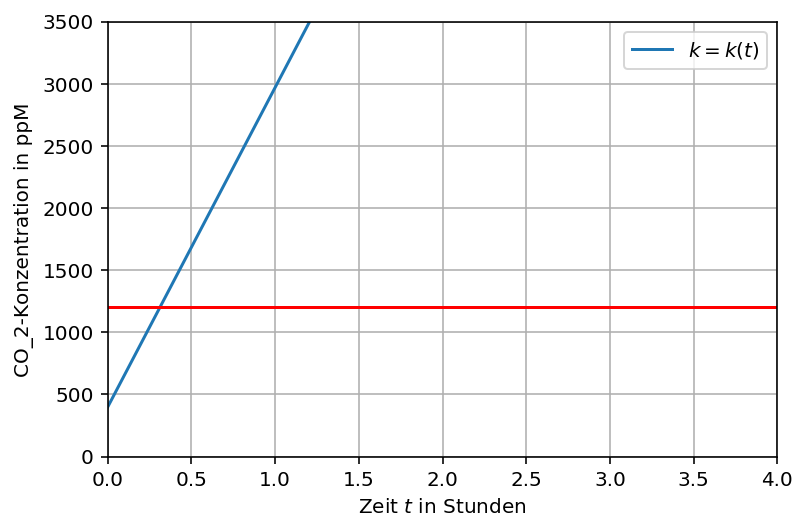

In [24]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')

ax.set(
    xlim=(0,4),xlabel='Zeit $t$ in Stunden',
    ylim=(0,3500),ylabel='CO_2-Konzentration in ppM'
)

ax.axhline(k_zul*1e6,c='r')
ax.grid()

Nach einer Stunde (von Hand berechnet):

In [29]:
(k_au + dV_co2/V_ra)*1e6

2971.4285714285716